In [50]:

#######################################################################
#                                                                     #
#  Copyright 2016 Theodore D Drivas                                   #
#                                                                     #
#  This file is part of pyTurbTraj.                                   #
#                                                                     #
#  pyTurbTraj is free software: you can redistribute it and/or modify #
#  it under the terms of the GNU General Public License as published  #
#  by the Free Software Foundation, either version 3 of the License,  #
#  or (at your option) any later version.                             #
#                                                                     #
#  pyTurbTraj is distributed in the hope that it will be useful,      #
#  but WITHOUT ANY WARRANTY; without even the implied warranty of     #
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the      #
#  GNU General Public License for more details.                       #
#                                                                     #
#  You should have received a copy of the GNU General Public License  #
#  along with pyTurbTraj.  If not, see <http://www.gnu.org/licenses/> #
#                                                                     #
#######################################################################

import numpy as np

%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import subprocess

from tools import *

In [44]:
databases      = np.array(['channel', 'isotropic'])  
which_database = databases[1]
    
if which_database == 'channel':
    DB = info
    file_title = '_Channel'
    folder = 'data_channel/history/'
elif which_database == 'isotropic':
    DB = info_iso
    file_title = '_Isotropic'
    folder = 'data_isotropic/history/'
    
Lx = DB['lx']
Ly = DB['ly']
Lz = DB['lz']

Top    =  Ly/2
Bottom = -Ly/2

t   = get_timeline(which_database, subdiv = 2) #make sure subdiv is same here as in data
tau = t[0] - t

PrandtlNumbers = np.array([1e1, 1e-0, 1e-1])   

npoints    = 10
nparticles = 100

suffix = file_title + '_data_points_{0}_particles_{1}.p'.format(npoints, nparticles)
if which_database == 'channel':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    LT      = pickle.load( open( folder + "LT"    + suffix, "rb" ) )
    LB      = pickle.load( open( folder + "LB"    + suffix, "rb" ) )
    HT      = pickle.load( open( folder + "HT"    + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )
elif which_database == 'isotropic':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )

<IPython.core.display.Javascript object>


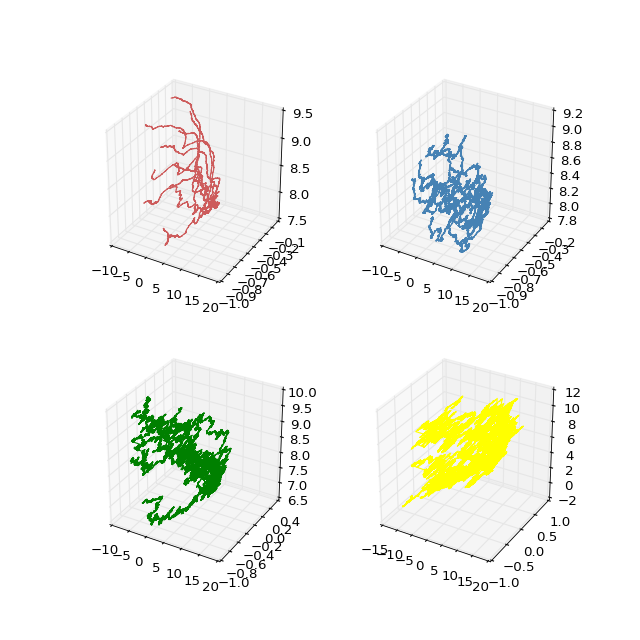

In [61]:
space_indx = 0

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221, projection = '3d')
ax2 = fig.add_subplot(222, projection = '3d')
ax3 = fig.add_subplot(223, projection = '3d')
ax4 = fig.add_subplot(224, projection = '3d')
axis = np.array([ax1, ax2, ax3, ax4])

colors = np.array(['Indianred', 'Steelblue','green', 'yellow'])
for i in range(10): #x[1].shape[2]
    for j in range(x.shape[0]):
        axis[j].plot(x[j][:, space_indx, i, 0],
                     x[j][:, space_indx, i, 1],
                     x[j][:, space_indx, i, 2],
                     color = colors[j])

<IPython.core.display.Javascript object>


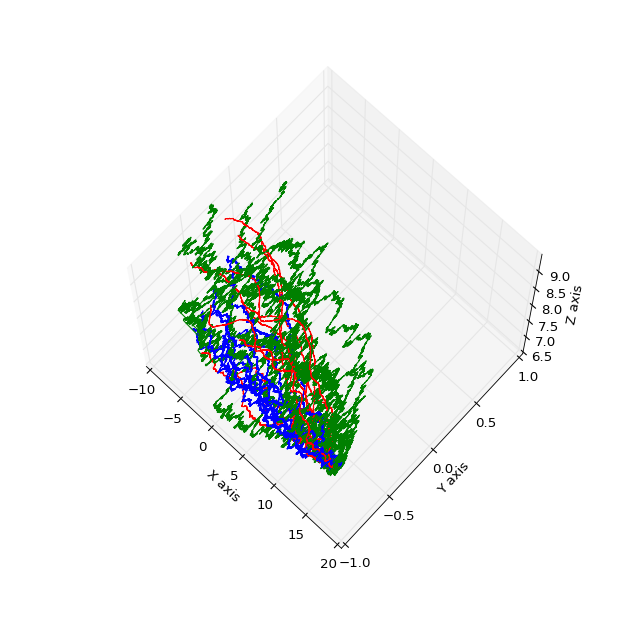

In [71]:
space_indx = 0

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection = '3d')

colors = np.array(['red', 'blue','green'])
for i in range(10): #x[1].shape[2]
    for j in range(3):
        ax.plot(x[j][:, space_indx, i, 0],
                x[j][:, space_indx, i, 1],
                x[j][:, space_indx, i, 2],
                color = colors[j])
ax.set_xlim3d(-10 , 20)
ax.set_ylim3d(-Ly/2, Ly/2)
ax.set_zlim3d(6.5, 3*np.pi) 

ax.view_init(elev=70., azim=-47)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')    

<IPython.core.display.Javascript object>


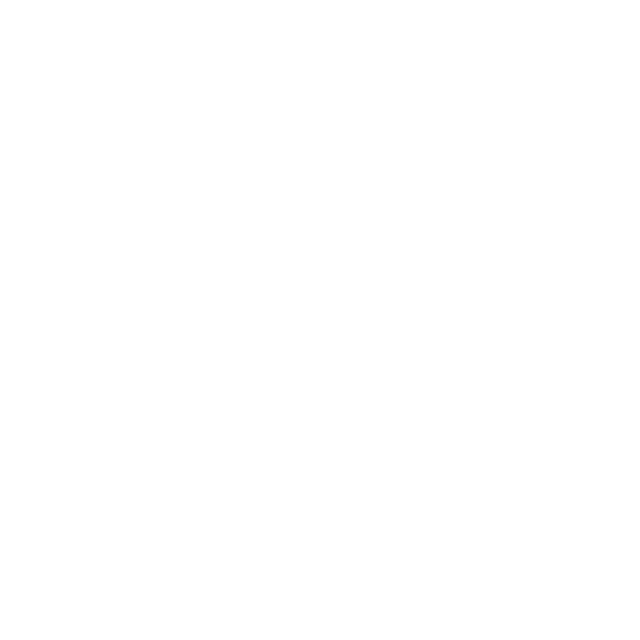

KeyboardInterrupt: 

In [37]:
##############################################
####### Make Movies of Particle Clouds #######
##############################################

for k in range(x[0].shape[1]):                   # base points 
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection = '3d')
    for i in range(x[0].shape[0]):               # times
        ax.cla() 
        ax.clear()
        colors =  np.array(['red','blue','green'])
        for j in range(x.shape[0]):              # Pr numbers
            ax.scatter(x[j][i, k, :, 0],
                       x[j][i, k, :, 1],
                       x[j][i, k, :, 2],
                       color = colors[j], label = '$Pr = {0}$'.format(PrandtlNumbers[j]))
        ax.set_xlim3d(0 , 8*np.pi)
        ax.set_ylim3d(-Ly/2, Ly/2)
        ax.set_zlim3d(0, 3*np.pi)
        suffix = 'channel_npoints_{0}_nparticles_{1}_space_{2}'.format(npoints, nparticles, k)
        fig.savefig('figs/' + suffix + '_frame_{0}.png'.format(i+10), format = 'png')
    subprocess.call(['ffmpeg', '-framerate', '250', '-start_number', '11', '-i', 'figs/' + suffix + '_frame_%02d.png',
                     '-c:v', 'libx264', '-pix_fmt', 'yuv420p', '-r', '30', 'movies/' + suffix + '.mp4'])

In [76]:
npoints = 1
nparticles = 100
suffix = 'channel_npoints_{0}_nparticles_{1}_space_{2}'.format(npoints, nparticles, 0)
subprocess.call(['ffmpeg', '-framerate', '1800', '-start_number', '11', '-i', 'figs/' + suffix + '_frame_%02d.png',
                     '-c:v', 'libx264', '-pix_fmt', 'yuv420p', '-r', '30', 'movies/' + suffix + '.mp4'])

0

In [85]:
from tools import *
databases      = np.array(['channel', 'isotropic'])  
which_database = databases[0]
subdiv = 2
t  = get_timeline(subdiv, which_database)

TypeError: unsupported operand type(s) for /: 'numpy.string_' and 'float'

In [95]:
def get_timeline(which_database = 'channel', subdiv = 2):
    if which_database == 'channel':
        T      = 25.9935
        DB_dt  = 0.0065
        nsteps = int(T/DB_dt)
    elif which_database == 'isotropic':
        T      = info_iso['time'][-1];
        nsteps = info_iso['time'].shape[0] 
    return np.linspace(T, 0, num = subdiv*nsteps+1)
        

In [100]:
t  = get_timeline(which_database, 
                      subdiv = 4 # subdivides database timestep using interpolation to getVelocity
                      )
t.shape

(15997,)